void set_plot_style()
{
    const Int_t NRGBs = 5;
    const Int_t NCont = 255;

    Double_t stops[NRGBs] = { 0.00, 0.34, 0.61, 0.84, 1.00 };
    Double_t red[NRGBs]   = { 0.00, 0.00, 0.87, 1.00, 0.51 };
    Double_t green[NRGBs] = { 0.00, 0.81, 1.00, 0.20, 0.00 };
    Double_t blue[NRGBs]  = { 0.51, 1.00, 0.12, 0.00, 0.00 };
    TColor::CreateGradientColorTable(NRGBs, stops, red, green, blue, NCont);
    gStyle->SetNumberContours(NCont);
}

## Numero de Eventos
$N_{x}=\mathcal{L}\sigma_{x}$, $N_{x}$: Numero de eventos de $x$, $\mathcal{L}$: Luminosity

## Efficiencia
$E_{ff_x}=\frac{N_{x_f}}{N_{x_o}}$, $N_{x_f}$:Numero de eventos de x despues de cortes, $N_{o_f}$: Numero de eventos de x antes de cortes.

Luego:

$N_{x_f}=E_{ff_x}N_{x_o}~\Rightarrow~N_{x_f}=E_{ff_x}\sigma_{x}\mathcal{L}$

In [1]:
#include<cmath>

In [2]:
gROOT->ProcessLine(".x CVSReader.C");

(int) 0


## Significancia
$Z=\frac{S}{\sqrt{S+B}}$, $S$: Numero de eventos de señal , $B$: Numero de eventos de background

In [3]:
/*XC pb and Lumi fb^{-1}*/
Double_t Significance(Double_t Lumi,Double_t XCSignal,Double_t EffSignal,std::vector<Double_t> XCBG,std::vector<Double_t> EffBG){
  
    if(XCBG.size() != EffBG.size()){
        std::cout<<  "ERROR: XCBG and EffBG should be same size" << std::endl;
        return 0;
    }
    Double_t TotalBG = 0;
    for (Int_t i=0;i<XCBG.size();i++){
        TotalBG += XCBG[i]*EffBG[i]*1000;//*1000 bp to fb
        //std::cout<<  TotalBG << std::endl;
    }
    Double_t Denominator = std::sqrt((XCSignal*EffSignal*1000+TotalBG)*Lumi);//*1000 bp to fb
    Double_t Numerator = XCSignal*EffSignal*Lumi*1000;
    Double_t Z = Numerator/Denominator;
    return Z;
}

$Z=\frac{S}{\sqrt{S+B}}~\Rightarrow~Z^2=\frac{S^2}{S+B}~\Rightarrow~Z^2=\frac{(E_{ff_S}\sigma_{S}\mathcal{L})^2}{(E_{ff_S}\sigma_{S}\mathcal{L})+(E_{ff_B}\sigma_{B}\mathcal{L})}$


$Z^2=\frac{E_{ff_S}\sigma_{S}^2\mathcal{L}}{E_{ff_S}\sigma_{S}+E_{ff_B}\sigma_{B}}$

## Luminosity to have some Significance
$\mathcal{L}=Z^2 \frac{E_{ff_S}\sigma_{S}+E_{ff_B}\sigma_{B}}{(E_{ff_S}\sigma_{S})^2}$

Si se tiene $N_{f_B}(100fb^{-1})=277606.870$, como $E_{ff_B}\sigma_{B}=\frac{N_{f_B}(100fb^{-1})}{100fb^{-1}}$, entonces

$E_{ff_B}\sigma_{B}=2776.06870fb=2.77606870pb$

In [4]:
//XC pb y lumi fb-1
Double_t Lumi(Double_t Z,Double_t XCSignal,Double_t EffSignal,std::vector<Double_t> XCBG,std::vector<Double_t> EffBG){
  
    if(XCBG.size() != EffBG.size()){
        std::cout<<  "ERROR: XCBG and EffBG should be same size" << std::endl;
        return 0;
    }
    Double_t TotalBG = 0;
    for (Int_t i=0;i<XCBG.size();i++){
        TotalBG += XCBG[i]*EffBG[i]*1000;//pb to fb
        //std::cout<< "XC: " <<XCBG[i] <<" , Eff: "<< EffBG[i]<< std::endl;
    }
    Double_t Numerator = ((EffSignal*XCSignal*1000)+TotalBG)*Z*Z;
    Double_t Denominator = (EffSignal*XCSignal*1000)*(EffSignal*XCSignal*1000);
    
    Double_t Lum = Numerator/Denominator;
    return Lum;
}

In [5]:
//Xs fb
Double_t Xs[]= {751.3, 633.5, 540.3, 460.3, 398.0, 343.3, 300.1, 262.3, 231.9, 203.9, 181.0, 161.1, 144.1, 128.9, 115.6, 103.8, 93.82, 84.97, 77.13};
Double_t MF[]= {100  , 105  , 110  , 115  , 120  , 125  , 130  , 135  , 140  , 145  , 150  , 155  , 160  , 165, 170, 175, 180, 185, 190};
// You can choose among the following methods:
// kLINEAR, kPOLYNOMIAL, kCSPLINE, kCSPLINE_PERIODIC, kAKIMA, kAKIMA_PERIODIC 
const Int_t ni = 19;//size of the arrays
ROOT::Math::Interpolator XS(ni, ROOT::Math::Interpolation::kLINEAR);
XS.SetData(ni, MF, Xs);

In [6]:
std::vector<Double_t> _XCBG;
std::vector<Double_t> _EffBG;
_XCBG.push_back(2.776068702);//In pb 2.776068702
_EffBG.push_back(1);

In [7]:
// Creating an object of CSVWriter
CSVReader reader("EffVLF_BRmu25_BRtau75_inter.csv");

In [8]:
// Get the data from CSV File
std::vector<std::vector<std::string> > dataList = reader.getData();

In [9]:
TCanvas *c1 = new TCanvas("c1","ContornPlot",200,10,700,500);

In [10]:
Double_t MinY = 2;
Double_t MinX = 100;
Double_t MaxY = 21;
Double_t MaxX = 170;

In [11]:
gStyle->SetOptStat(0);
//TH2D *h1 = new TH2D("h1","h1",19,MinX,MaxX,14,MinY,MaxY);
TH2D *h1 = new TH2D("h1","h1",14,MinX,MaxX,19,MinY,MaxY);
std::vector<Double_t> FistRow;
std::vector<Double_t> FistCol;
int count1 = 0;

In [12]:
auto Frame = c1->DrawFrame(MinX,MinY,MaxX,MaxY);
c1->SetRightMargin(0.15);
//gStyle->SetPalette(55);
//gStyle->SetPalette(87);
gStyle->SetPalette(1);
gStyle->SetNumberContours(35)

In [13]:
Frame->GetXaxis()->SetTitle("m_{F} [GeV]");
Frame->GetYaxis()->SetTitle("#Deltam(F,#chi) [GeV]");
Frame->GetYaxis()->CenterTitle("True");
Frame->GetYaxis()->SetTitleFont(42);
Frame->GetXaxis()->SetTitleFont(42);
Frame->GetYaxis()->SetTitleSize(0.04);
Frame->GetXaxis()->SetTitleSize(0.04);

In [14]:
//TLatex *   tex = new TLatex(0.85,0.91,"BR(F#rightarrow #mu,#tau)= 25%,75%; 3#sigma (13 TeV, 0 PU)");
TLatex *   tex = new TLatex(0.85,0.91,"BR(F #rightarrow #mu)= 25%, BR(F #rightarrow #tau)= 75%; 3#sigma, 13 TeV");
tex->SetNDC();
tex->SetTextAlign(31);
tex->SetTextFont(42);
tex->SetTextSize(0.04);
tex->SetLineWidth(2);
tex->Draw("Same");

In [15]:
TLatex *   tex1 = new TLatex(0.97,0.7,"Luminosity [10^{3} fb^{-1}]");
tex1->SetNDC();
tex1->SetTextAlign(31);
tex1->SetTextFont(42);
tex1->SetTextSize(0.04);
tex1->SetLineWidth(2);
tex1->SetTextAngle(90);
//tex1->Draw("Same");

In [16]:
//gStyle->SetPaintTextFormat("4.1f m");
gStyle->SetPaintTextFormat("1.2f");

In [17]:
Bool_t debug = kFALSE;  //kTRUE

In [18]:
// Print the content of row by row on screen
count1 = 0; 
for(std::vector<std::string> vec : dataList){
    int count2 = 0;
    for(std::string Data : vec){
        Double_t data = atof(Data.c_str());
        if (count1 == 0){
            FistRow.push_back(data);
        }else{
            if (count2 == 0){
                FistCol.push_back(data);
            }else{
                if(data != 0){//To be sure dont use the 0s
                    // Z/31.63 Para que Lumi=lumi/1000
                    /*
                    3sigma = 0.0948466646
                    5sigma = 0.1580777743                
                    */
                    Double_t Lum = Lumi(0.0948466646,XS.Eval((Double_t)FistRow[count2])*0.001,data,_XCBG,_EffBG);
                    //h1->Fill(FistCol.back(),FistRow[count2],Lum);
                    h1->Fill(FistRow[count2],FistCol.back(),Lum);
                    if(debug){
                        std::cout<<"XS: "<<XS.Eval(FistRow[count2])*0.001,4;
                        std::cout<<" (" << FistCol.back() << ","; 
                        std::cout<<FistRow[count2] << ",";
                        std::cout<<data << ") , ";
                    }
                    }else{
                        //Deberia extrapolar entre los que o tengo
                    }
                }
            
        }
        count2++;
    }
    count1++;
    if(debug){
        std::cout<<std::endl;
        std::cout<<std::endl;
    }
} 

In [19]:
h1->DrawCopy("colz same");
h1->DrawCopy("TEXT same");
//h1->DrawCopy("TEXTE0 same");
tex1->Draw("Same");

Double_t contours[1];
contours[0] = 3.0;
//contours[1] = 3.0;
//contours[2] = 5.0;
//contours[3] = 4.0;
//contours[4] = 5.0;
//contours[5] = 6.0;

h1->SetContour(1, contours);
//h1->SetContourLevel(2,3.0);
// Draw contours as filled regions, and Save points
//h1->Draw("CONT Z LIST");
h1->Draw("CONT2 SAME");
c1->Update(); // Needed to force the plotting and retrieve the contours in TGraphs

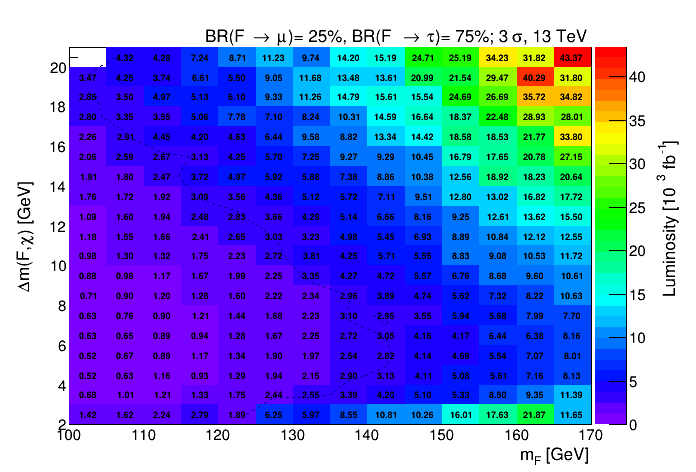

In [20]:
c1->Draw()

In [21]:
string Name    = "";
string NameC   = "";
string NamePDF = "";

In [22]:
Name = "LumiToExclusionSigma3_BRmu25tau75";
NameC = Name +".C";
NamePDF = Name +".pdf";
//c1->SaveSource(NameC.c_str());
//c1->SaveAs(NamePDF.c_str(),"pdf");

In [23]:
.! pwd

/home/camilo/cms/AnalysisCode/ContourPlot


In [24]:
TCanvas *c2 = new TCanvas("c2","A Simple Graph Example",200,10,700,500);

In [25]:
Double_t X1[] = {79.48149378,81.62228227,85.31695999,90.77778625,96.58315057,100.0697627,104.6021776,109.337053,116.3323126,120.5505422,122.9308109,122.9498635,122.9816244};
Double_t X2[] = {178.3302759,179.6014626,181.1950056,187.6972827,192.7528014,208.7295656,212.4554587,216.2590315,224.0601066,238.3952161,251.4102402,269.8894863,287.1715415,287.1863766,300.2403062,300.4652831,300.5351378};
Double_t Y1[] = {1.137019796,1.136737669,1.130436827,1.13560916,1.129120233,1.134574693,1.134104481,1.127803639,1.127145343,1.16758358,1.581370198,1.616353976,1.674660272};
Double_t Y2[] = {1.559928528,1.163351672,1.157427,1.116236423,1.115954295,1.091785395,1.085766681,1.091409226,1.091033056,1.090374759,1.089810505,1.100719424,1.111722387,1.123383646,1.157897212,1.32698547,1.379461137};

//Excluido del analysis
//Double_t Mf3[] = {100.0,110.0,120.0,130.0,140.0,150.0,160.0,170.0,180.0,190.0,200.0,210.0,220.0,230.0,240.0,250.0};
//Double_t Df3[] = {20.00,22.00,24.00,26.00,28.00,30.00,32.00,34.00,36.00,38.00,40.00,42.00,44.00,46.00,48.00,50.00};
//Double_t Df3[] = {-12,-8,-4,0,4,8,12,16,20,24,28,32,36,40,44,48};
Double_t Mf3[] = {100.486618005,101.946472019,104.136253041,106.812652068,109.245742092,112.408759124,115.815085158,119.9513382,125.304136253,128.710462287,131.386861314,136.253041363,143.065693431,146.228710462,148.905109489,152.798053528,156.934306569,164.233576642,169.829683698,173.96593674,176.642335766,180.778588808,186.131386861,192.944038929,198.540145985,202.676399027,211.922141119};
Double_t Df3[] = {8.53510895884,8.59564164649,8.65617433414,8.71670702179,8.77723970944,8.89830508475,9.01937046005,9.0799031477,9.200968523,9.26150121065,9.32203389831,9.38256658596,9.56416464891,9.56416464891,9.56416464891,9.62469733656,9.68523002421,9.74576271186,9.80629539952,9.86682808717,9.86682808717,9.98789346247,9.98789346247,9.98789346247,9.98789346247,9.92736077482,9.98789346247};
Double_t Mf2[]={278.18248478,  276.77589675,  275.31042028,  273.78972256, 272.21747076,  270.59733207,  268.93297367,  267.22806274,
        265.48626646,  263.71125201,  261.90668658,  260.07623734,258.22357148,  256.35235617,  254.4662586 ,  252.56894596,
        250.66408541,  248.75534414,  246.84638934,  244.94088818,243.04250785,  241.15491552,  239.28177838,  237.42676361,
        235.59353839,  233.7857699 ,  232.00712532,  230.26127184,228.55187663,  226.88260688,  225.25712976,  223.67911246,
        222.15222216,  220.68012605,  219.26649129,  217.91498508,216.62927459,  215.413027  ,  214.2699095 ,  213.20358927,
        212.21773349,  211.31600934,  210.502084  ,  209.77962465,209.15229848,  208.63510676,  208.39985793,  208.73284908,
        209.92063892,  211.99295957,  214.49463403,  216.95713173,219.25306776,  221.42612034,  223.52125006,  225.58341748,
        227.65758317,  229.7776721 ,  231.91829079,  234.06810649,236.24446848,  238.45842928,  240.69980903,  242.95449154,
        245.20846465,  247.45393869,  249.69275682,  251.92758943,254.1611069 ,  256.39597963,  258.634878  ,  260.88037842,
        263.13176967,  265.38427041,  267.63284659,  269.87246414,272.09808902,  274.30469298,  276.49018205,  278.66014869,
        280.82142859,  282.98085747,  285.14527101,  287.32150494,289.51639495,  291.73677675,  293.98948604,  296.28135852,
        298.61783452,  300.98768548,  303.36871222,  305.73852275,308.07472509,  310.35492726,  312.55673726,  314.65776312,
        316.63561283,  318.46789442,  320.13658043,  321.70727246,323.31881078,  325.04462726,  326.87533827,  328.7965584 ,
        330.79390226,  332.85298444,  334.95941955,  337.0988222 ,339.25680698,  341.41898849,  343.57098135,  345.69840015,
        347.78686034,  349.82532007,  351.81366747,  353.7540211 ,355.64849953,  357.4992213 ,  359.308305  ,  361.07786918,
        362.81003239,  364.50691321,  366.1706302 ,  367.80330191,369.40704691,  370.98398376,  372.53623102,  374.06590725,
        375.57513103,  377.0660209 ,  378.54069543,  380.00127318, 381.44987271,  382.88861259,  384.31961138,  385.74498763,
        387.16685992,  388.5873468 ,  390.00856683,  391.43263858,392.86168061,  394.29781148,  395.74314976,  397.19981399,
        398.66992275,  400.1555946 ,  401.6589481 ,  403.18210181,404.72717429,  406.29628411,  407.89154983,  409.51509   ,
        411.1690232 ,  412.85546798,  414.5765429 };

Double_t Df2[] = {99.85220888,   97.8650858 ,   95.9706359 ,   94.16359876,         92.43871397,   90.7907211 ,   89.21435972,   87.70436942,
         86.25548978,   84.86246037,   83.52002077,   82.22291056, 80.96586931,   79.7436366 ,   78.55095202,   77.38255514,
         76.23318553,   75.09758278,   73.97048647,   72.84663616,  71.72077144,   70.58763189,   69.44195709,   68.2784866 ,
         67.09196002,   65.87711692,   64.62869687,   63.34143945,  62.01008425,   60.62937084,   59.1940388 ,   57.6988277 ,
         56.13847712,   54.50772665,   52.80131586,   51.01398432, 49.14047162,   47.17551733,   45.11386103,   42.9502423 ,
         40.67940072,   38.29607587,   35.79500731,   33.17093464, 30.41859742,   27.55107596,   24.83519405,   22.72303976,
         21.66736469,   21.73163016,   22.24428629,   22.51346634, 22.36376247,   21.87873858,   21.14389986,   20.24475154,
         19.26679881,   18.39324444,   18.29960001,   19.00379146,  19.83704   ,   20.29745181,   20.43949906,   20.4208012 ,
         20.39786638,   20.46074782,   20.59662174,   20.78382967, 21.00071315,   21.2256137 ,   21.43687288,   21.6133606 ,
         21.7524289 ,   21.87431086,   22.00066037,   22.1531313 , 22.35337754,   22.62303369,   22.97405232,   23.39302297,
         23.8624329 ,   24.36476934,   24.88251953,   25.39817072, 25.89421015,   26.35312505,   26.75740267,   27.08953025,
         27.33481597,   27.51226655,   27.66306727,   27.82879325,28.0510196 ,   28.37132142,   28.83127384,   29.47245196,
         30.33643089,   31.46478573,   32.89167701,   34.5091938 ,  36.08491474,   37.4944902 ,   38.75055553,   39.87401943,
         40.88579059,   41.80677771,   42.65788951,   43.46003469, 44.23412194,   45.00105997,   45.78175748,   46.59712317,
         47.46806452,   48.41063911,   49.42504624,   50.50824909, 51.65721085,   52.86889471,   54.14026386,   55.46828149,
         56.84991078,   58.28211492,   59.7618571 ,   61.28610051,  62.85180832,   64.45594374,   66.09546995,   67.76735013,
         69.46854748,   71.19602517,   72.94674641,   74.71767437,  76.50577224,   78.30800322,   80.12133048,   81.94271722,
         83.76912663,   85.59752188,   87.42486617,   89.24812269, 91.06425462,   92.87022515,   94.66299748,   96.43953477,
         98.19680023,   99.93175705,  101.6413684 ,  103.32259747,   104.97240747,  106.58776156,  108.16562294,  109.70295479,
        111.19672032,  112.64388269,  114.0414051 };

In [26]:
//TRANSFORMACIONES
/* MF1=X1*Y1 MF2=X2*Y2 DM1=MF1-X1 DM2=MF2-X2 */

unsigned long Size1 = sizeof(X1)/sizeof(*X1);
//unsigned long Size2 = sizeof(X2)/sizeof(*X2);
unsigned long Size2 = sizeof(Df2)/sizeof(*Df2);
unsigned long Size3 = sizeof(Df3)/sizeof(*Df3);

TVectorD MF1,MF2,MF3,DM1,DM2,DM3;

MF1.ResizeTo(Size1);
MF2.ResizeTo(Size2);
DM1.ResizeTo(Size1);
DM2.ResizeTo(Size2);
MF3.ResizeTo(Size3);
DM3.ResizeTo(Size3);


for ( auto i = 0 ; i < Size1 ; i++ ) {
    MF1[i]=(X1[i]*Y1[i]);
    DM1[i]=(X1[i]*Y1[i]-X1[i]);
}

for ( auto i = 0 ; i < Size2 ; i++ ) {
    //MF2[i]=(X2[i]*Y2[i]);
    //DM2[i]=(X2[i]*Y2[i]-X2[i]);
    MF2[i]=Mf2[i];
    DM2[i]=Df2[i];
    
}

for ( auto i = 0 ; i < Size3 ; i++ ) {
    MF3[i]=Mf3[i];
    DM3[i]=Df3[i];
}
//c2->SetGrid();
Double_t MinX2 = 100.0;
Double_t MaxX2 = 170.0;
Double_t MinY2 = 2.0;
Double_t MaxY2 = 20.0;
auto Frame2 = c2->DrawFrame(MinX2,MinY2,MaxX2,MaxY2);
Frame2->GetXaxis()->SetTitle("m_{F} [GeV]");
Frame2->GetYaxis()->SetTitle("#Delta m(F,DM) [GeV]");
Frame2->GetYaxis()->CenterTitle("True");
Frame2->GetYaxis()->SetTitleFont(42);
Frame2->GetXaxis()->SetTitleFont(42);
Frame2->GetYaxis()->SetTitleSize(0.04);
Frame2->GetXaxis()->SetTitleSize(0.04);
TGraph *dm1 = new TGraph(MF1,DM1);
TGraph *dm2 = new TGraph(MF2,DM2);
TGraph *dm3 = new TGraph(MF3,DM3);

//Graph 1
Double_t XMax1 = 170;
Double_t XMin1 = 100;
Double_t YMax1 = 20;

const Int_t n = 20;
Double_t x[n],ymin[n], ymax[n];
Double_t dx = (XMax1-XMin1)/n; 
for (Int_t i=0;i<n;i++) {
    x[i] = XMin1+i*dx;
    ymax[i] = YMax1;
    ymin[i] = dm1->Eval(x[i]);
}
TGraph *grshade = new TGraph(2*n);

for (Int_t i=0;i<n;i++) {
    grshade->SetPoint(i,x[i],ymax[i]);
    grshade->SetPoint(n+i,x[n-i-1],ymin[n-i-1]);
}
grshade->SetFillStyle(3001);
grshade->SetFillColor(16);
grshade->SetName("grshade");
grshade->Draw("F");
dm1->SetLineColor(16);
dm1->SetName("dm1");
dm1->Draw("L, Same");
//Graph 2
Double_t XMax2 = 260;
Double_t XMin2 = 100;
Double_t YMax2 = 0;

const Int_t n2 = 20;
Double_t x2[n2],y2min[n2], y2max[n2];
Double_t dx2 = (XMax2-XMin2)/n2; 
dm2->SetFillStyle(3001);
dm2->SetFillColor(16);
dm2->SetLineColor(16);
dm2->SetName("dm2");
dm2->Draw("F,Same");
dm2->Draw("L,Same");
for (Int_t i=0;i<n;i++) {
    x[i] = XMin2+i*dx2;
    ymax[i] = YMax2;
    ymin[i] = dm3->Eval(x[i]);
}
TGraph *grshade2 = new TGraph(2*n);

for (Int_t i=0;i<n;i++) {
    grshade2->SetPoint(i,x[i],ymax[i]);
    grshade2->SetPoint(n+i,x[n-i-1],ymin[n-i-1]);
}
grshade2->SetFillStyle(3003);
grshade2->SetFillColor(2);
grshade2->SetLineColor(2);
grshade2->SetName("grshade2");
grshade2->Draw("F, Same");
dm3->SetLineColor(2);
dm3->SetFillStyle(3002);
dm3->SetName("dm3");
dm3->Draw("L,Same");

tex2 = new TLatex(0.3,0.94,"projected exclusion");
tex2->SetNDC();
tex2->SetTextAlign(23);
tex2->SetTextFont(42);
tex2->SetTextSize(0.04);
tex2->SetLineWidth(2);
tex2->Draw("Same");

TLegend *legend2 = new TLegend(0.55,0.55,0.89,0.8);
legend2->SetFillStyle(0);
legend2->SetBorderSize(0);
legend2->SetTextSize(0.039);
legend2->SetTextFont(42);
legend2->AddEntry("dm2", "#splitline{95% CL Fermi-LAT}{Gamma ray excluded }","f");
legend2->AddEntry("grshade2", "#Omega_{S}<#Omega_{DM},~Y_{#mu}=1","f");
legend2->Draw();

In [27]:
h1->SetLineColor(3);
h1->SetFillStyle(3144);
h1->Draw("CONT4 SAME");

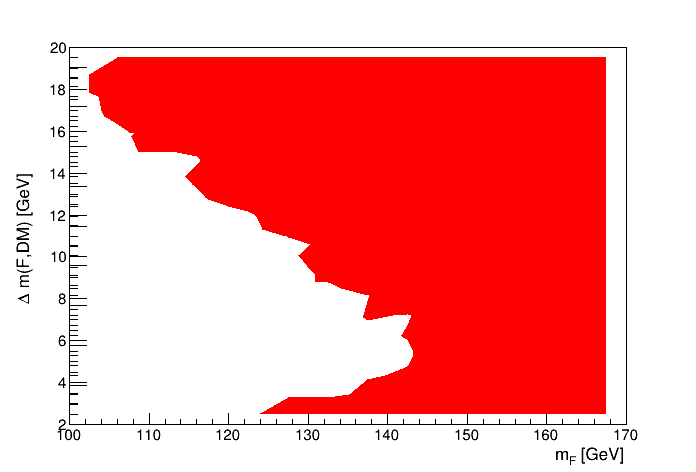

In [28]:
c2->Draw();

In [29]:
c2->SaveSource("LimitPlotsTesis.C");
c2->SaveAs("LimitPlotsTesis.pdf","pdf");

Info in <TCanvas::SaveSource>: C++ Macro file: LimitPlotsTesis.C has been generated
Info in <TCanvas::Print>: pdf file LimitPlotsTesis.pdf has been created
